In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\jasa\\Airbnb.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600


In [6]:
df=data.drop(columns=['Date'],axis=1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       365 non-null    float64
 1   High       365 non-null    float64
 2   Low        365 non-null    float64
 3   Close      365 non-null    float64
 4   Adj Close  365 non-null    float64
 5   Volume     365 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


In [9]:
#normalize heterogenous numerical data
df_norm=pd.DataFrame(normalize(df),columns=df.columns)
df_norm

,Open,High,Low,Close,Adj Close,Volume
0,0.000002,0.000002,0.000002,0.000002,0.000002,1.0
1,0.000005,0.000006,0.000005,0.000005,0.000005,1.0
2,0.000008,0.000008,0.000007,0.000008,0.000008,1.0
3,0.000012,0.000012,0.000011,0.000011,0.000011,1.0
4,0.000006,0.000007,0.000006,0.000007,0.000007,1.0
...,...,...,...,...,...,...
360,0.000017,0.000017,0.000016,0.000017,0.000017,1.0
361,0.000012,0.000012,0.000011,0.000011,0.000011,1.0
362,0.000012,0.000013,0.000012,0.000013,0.000013,1.0
363,0.000017,0.000017,0.000016,0.000016,0.000016,1.0


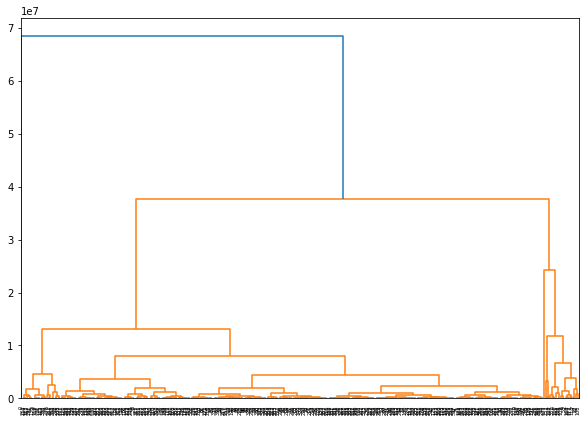

In [14]:
#create dendrograms
plt.figure(figsize=(10,7))
dendrograms=sch.dendrogram(sch.linkage(df,'complete'))

In [15]:
#create clusters(y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [17]:
y=pd.DataFrame(hclusters.fit_predict(df_norm),columns=['Open'])
y['Open'].value_counts()

0    124
3    103
1     77
2     43
4     18
Name: Open, dtype: int64

In [18]:
#Adding clusters to dataset
df['Open']=hclusters.labels_
df

,Open,High,Low,Close,Adj Close,Volume
0,0,165.000000,141.250000,144.710007,144.710007,70447500
1,0,151.500000,135.100006,139.250000,139.250000,26980800
2,0,135.300003,125.160004,130.000000,130.000000,16966100
3,0,127.599998,121.500000,124.800003,124.800003,10914400
4,0,142.000000,124.910004,137.990005,137.990005,20409600
...,...,...,...,...,...,...
360,0,120.180000,114.510002,117.500000,117.500000,6962900
361,0,117.040001,107.620003,108.029999,108.029999,9718700
362,0,116.349998,107.449997,114.169998,114.169998,8926600
363,0,116.250000,108.500000,112.550003,112.550003,6958300


In [19]:
df.groupby('Open').agg(['mean']).reset_index()

,Open,High,Low,Close,Adj Close,Volume
,,mean,mean,mean,mean,mean
0,0,157.469572,147.282356,152.486290,152.486290,1.171729e+07
1,1,174.954545,167.574662,171.033118,171.033118,4.062112e+06
2,2,181.409395,175.126466,177.997210,177.997210,3.093298e+06
3,3,165.264262,157.750748,161.487573,161.487573,5.543028e+06
4,4,182.045613,176.596668,179.284445,179.284445,2.439106e+06


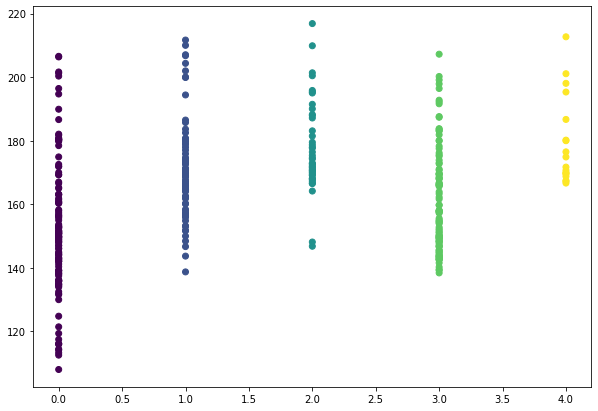

In [20]:
#plot clusters
plt.figure(figsize=(10,7))
plt.scatter(df['Open'],df['Adj Close'],c=hclusters.labels_)